In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [2]:
data=pd.read_csv('u.data',sep='\t',names=['user id','item id','rating','timestamp'])

In [3]:
data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Finding for missing values

(array([560., 183.,  96.,  55.,  25.,  15.,   5.,   1.,   1.,   2.]),
 array([ 20. ,  91.7, 163.4, 235.1, 306.8, 378.5, 450.2, 521.9, 593.6,
        665.3, 737. ]),
 <a list of 10 Patch objects>)

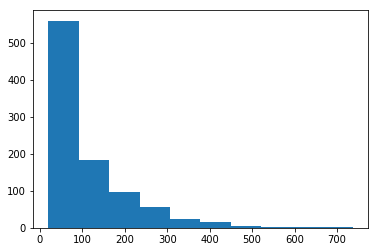

In [4]:
plt.hist(data['user id'].value_counts(dropna= False))

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

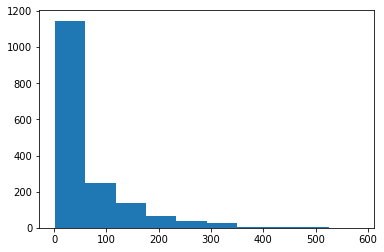

In [5]:
plt.hist(data['item id'].value_counts(dropna= False))

In [6]:
head=['item id','title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
items=pd.read_csv('u.item',sep='|',names=head,encoding='latin')

In [7]:
print(items.shape)
items.head()

(1682, 24)


,item id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
items.drop(['video release date'],inplace=True,axis=1)

In [9]:
users=pd.read_csv('u.user',sep='|',names=['user id','age','gender','occupation','zip code'])

In [10]:
user_data= users.merge(data,left_on= 'user id', right_on='user id', how='right')
print(user_data.shape)

(100000, 8)


In [11]:
movie_user_data= user_data.merge(items, left_on= 'item id', right_on='item id', how= 'left')
print(movie_user_data.shape)
movie_user_data.head()

(100000, 30)


,user id,age,gender,occupation,zip code,item id,rating,timestamp,title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,888732928,"Grand Day Out, A (1992)",01-Jan-1992,...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,878542699,Desperado (1995),01-Jan-1995,...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,85711,160,4,875072547,Glengarry Glen Ross (1992),01-Jan-1992,...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,20,4,887431883,Angels and Insects (1995),01-Jan-1995,...,0,0,0,0,0,1,0,0,0,0


In [12]:
movie_ratings = (movie_user_data.groupby(by = ['item id'])['rating'].count(). reset_index())
print(movie_ratings.sort_values(by=['rating'], ascending=False))

      item id  rating
49         50     583
257       258     509
99        100     508
180       181     507
293       294     485
285       286     481
287       288     478
0           1     452
299       300     431
120       121     429
173       174     420
126       127     413
55         56     394
6           7     392
97         98     390
236       237     384
116       117     378
171       172     367
221       222     365
312       313     350
203       204     350
404       405     344
78         79     336
209       210     331
150       151     326
172       173     324
68         69     321
747       748     316
167       168     316
268       269     315
...       ...     ...
1339     1340       1
1338     1339       1
1594     1595       1
1595     1596       1
1328     1329       1
1598     1599       1
1324     1325       1
1600     1601       1
1602     1603       1
1603     1604       1
1582     1583       1
1580     1581       1
1563     1564       1
1579     1

In [13]:
RatingsCount_threshold = 100
movie_ratings_popular=movie_ratings.query('rating>=@RatingsCount_threshold')
movie_ratings_popular.head()

,item id,rating
0,1,452
1,2,131
3,4,209
6,7,392
7,8,219


In [14]:
ratings_df= movie_ratings_popular.merge(movie_user_data,left_on= 'item id', right_on='item id', how= 'left')
print(ratings_df.shape)
ratings_df.head()

(64819, 31)


,item id,rating_x,user id,age,gender,occupation,zip code,rating_y,timestamp,title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,452,1,24,M,technician,85711,5,874965758,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
1,1,452,2,53,F,other,94043,4,888550871,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
2,1,452,5,33,F,other,15213,4,875635748,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
3,1,452,6,42,M,executive,98101,4,883599478,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
4,1,452,10,53,M,lawyer,90703,4,877888877,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0


In [15]:
ratings_df.rename(columns={"rating_y":"rating"}, inplace= True)
ratings_df.drop(['rating_x','zip code'],inplace=True,axis=1)

In [16]:
print(ratings_df.shape)
ratings_df

(64819, 29)


,item id,user id,age,gender,occupation,rating,timestamp,title,release date,IMDb URL,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,24,M,technician,5,874965758,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
1,1,2,53,F,other,4,888550871,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
2,1,5,33,F,other,4,875635748,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
3,1,6,42,M,executive,4,883599478,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
4,1,10,53,M,lawyer,4,877888877,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
5,1,13,47,M,educator,3,882140487,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
6,1,15,49,F,educator,1,879455635,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
7,1,16,21,M,entertainment,5,877717833,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
8,1,17,30,M,programmer,4,885272579,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0
9,1,18,35,F,other,5,880130802,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,0,0


In [22]:
ratings=pd.pivot_table(ratings_df,index='user id',columns='item id',values='rating').fillna(0)
ratings.head()

item id,1,2,4,7,8,9,11,12,13,14,...,845,866,879,895,926,928,1012,1016,1028,1047
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,3.0,4.0,1.0,5.0,2.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
n_users = ratings.shape[0] #considering only those users who gave explicit ratings
n_movies = ratings.shape[1]
print(n_users, n_movies)

943 338


In [28]:
ratings.shape

(943, 338)

In [29]:
#setting global variables
global metric,k
k=10
metric='cosine'

In [32]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances

#### User-based Recommendation System

In [33]:
#This function finds k similar users given the user id and ratings df
#These similarities are same as obtained via using pairwise_distances
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [34]:
findksimilarusers(70, ratings, metric = metric, k=k)

(array([1.        , 0.65554771, 0.61920027, 0.61898402, 0.60139394,
        0.58703515, 0.58700344, 0.58637588, 0.58552404, 0.57978744,
        0.578528  ]),
 array([[ 69, 806, 306, 471, 544, 199, 274, 881, 253, 737, 289]],
       dtype=int64))

In [36]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [37]:
predict_userbased(5, 12, ratings, metric = metric, k=k)


Predicted rating for user 5 -> item 12: 1


1

In [39]:
predict_userbased(4, 1, ratings, metric = metric, k=k)


Predicted rating for user 4 -> item 1: 0


0

#### Item-based Recommendation System

In [40]:
#This function finds k similar items given the item id and ratings df

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [43]:
findksimilaritems(14, ratings, metric=metric, k=k)

(array([1.        , 0.55210205, 0.54020587, 0.51089654, 0.50324783,
        0.484197  , 0.46943764, 0.46566299, 0.46128069, 0.46042378,
        0.45646248]),
 array([[  9, 176, 182,  75,  57,  60,  92,  66,   5, 250, 177]],
       dtype=int64))